In [15]:
import warnings
warnings.filterwarnings('ignore')

### 패션 MNIST 데이터 불러오기

In [16]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1,28,28,1) / 255.0

train_scaled,val_scaled,train_target,val_target = train_test_split(
    train_scaled,train_target,test_size=0.2,random_state=42
)

- keras에서 입력데이터가 3차원으로 구성되어 있을 것이라고 가정하고 있으므로 차원을 추가해서 channel차원으로 1을 추가하였음
- train set을 train과 valid로 구분

# 합성곱 신경망 만들기

In [17]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = '3'

In [18]:
model = keras.Sequential()

In [19]:
model.add(
    keras.layers.Conv2D(
        32,
        kernel_size = 3, # (=(3,3))
        activation = 'relu',
        padding = 'same',
        input_shape=(28,28,1)
    )
)

In [20]:
model.add(keras.layers.MaxPooling2D(2))

In [21]:
model.add(
    keras.layers.Conv2D(
        64, # filter의 개수
        kernel_size = 3,
        activation = 'relu',
        padding = 'same' 
    )
)

In [22]:
model.add(keras.layers.MaxPooling2D(2))

> 특징점을 더 잡기 위해 Conv2D를 두개의 층을 씀

In [23]:
model.add(keras.layers.Flatten()) 
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))

In [24]:
64 * 7 *7

3136

In [25]:
28*28

784

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 100)              

### Model Compile과 훈련

In [27]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy', 
    metrics = 'accuracy'
)
checkpoint_cb = keras.callbacks.ModelCheckpoint('../Data/best_cnn_model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(
    train_scaled , 
    train_target ,
    epochs = 20 ,
    validation_data = (val_scaled , val_target) ,
    callbacks = [checkpoint_cb , early_stopping_cb]
)

Epoch 1/20
1500/1500 [==============================] - 30s 19ms/step - loss: 0.5180 - accuracy: 0.8164 - val_loss: 0.3442 - val_accuracy: 0.8762
Epoch 2/20
1500/1500 [==============================] - 28s 19ms/step - loss: 0.3436 - accuracy: 0.8764 - val_loss: 0.2817 - val_accuracy: 0.8967
Epoch 3/20
1500/1500 [==============================] - 30s 20ms/step - loss: 0.2959 - accuracy: 0.8924 - val_loss: 0.2672 - val_accuracy: 0.9024
Epoch 4/20
1500/1500 [==============================] - 30s 20ms/step - loss: 0.2633 - accuracy: 0.9042 - val_loss: 0.2550 - val_accuracy: 0.9074
Epoch 5/20
1500/1500 [==============================] - 31s 21ms/step - loss: 0.2394 - accuracy: 0.9115 - val_loss: 0.2391 - val_accuracy: 0.9139
Epoch 6/20
1500/1500 [==============================] - 33s 22ms/step - loss: 0.2185 - accuracy: 0.9185 - val_loss: 0.2270 - val_accuracy: 0.9169
Epoch 7/20
1500/1500 [==============================] - 31s 21ms/step - loss: 0.2027 - accuracy: 0.9251 - val_loss: 0.2177 -

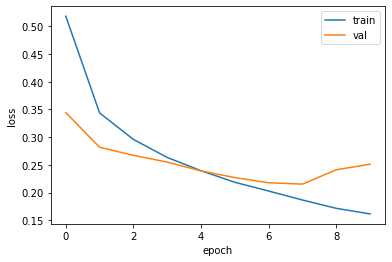

In [29]:
# 시각화 해보기
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [30]:
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 2s 5ms/step - loss: 0.2153 - accuracy: 0.9222


[0.21526412665843964, 0.922249972820282]

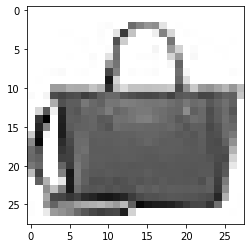

In [31]:
# 이미지로 확인해보기
plt.imshow(val_scaled[0].reshape(28,28),cmap='gray_r')
plt.show()

In [32]:
pred = model.predict(val_scaled[0:1])
print(pred) 

1/1 [==============================] - 0s 152ms/step
[[8.39022239e-16 9.17784364e-24 3.90972541e-17 6.75233357e-17
  8.05225519e-16 4.12472461e-16 1.12981313e-13 4.04456157e-15
  1.00000000e+00 2.21070737e-14]]


In [33]:
# 계단함수
import numpy as np
classes = ['티셔츠','바지','스웨터','드레스','코트','샌들','셔츠','스니커즈','가방','앵글부츠']

In [34]:
print(classes[np.argmax(pred)])

가방


### 시험 데이터를 확인하기

In [35]:
test_scaled = test_input.reshape(-1,28,28,1) /255.0

In [36]:
model.evaluate(test_scaled,test_target)

313/313 [==============================] - 2s 5ms/step - loss: 0.2425 - accuracy: 0.9163


[0.2424657940864563, 0.9162999987602234]